# APS - otimização por vetor gradiente

Bruno Zalcberg, Humberto Filho e Rafael Paves

Maio/2023

#### **1a etapa:** 

$$
f(x, y) = x^2 + xy + 4y^2 - x + 3y
$$

##### a) Construa o gráfico de 𝑓 no GeoGebra e observe que 𝑓 possui um único ponto de mínimo e não possui pontos de máximo

![Gráfico no GeoGebra](etapa1.png)

##### b) Determine o vetor gradiente de 𝑓 em um ponto genérico (𝑥, 𝑦)

As derivadas parciais dessa função são dadas por: 

$$\frac{\partial f}{\partial x} = 2x + y - 1$$
$$\frac{\partial f}{\partial y} = x + 8y + 3$$

Dessa forma, o vetor gradiente em um ponto genérico $(x, y)$ é:

$$\nabla f = \begin{bmatrix} 2x + y - 1 \\ x + 8y + 3 \end{bmatrix}$$

##### c) Usando as ideias desenvolvidas na página anterior, elabore um código que permita determinar o ponto de mínimo da função 𝑓. Utilize um passo fixo 𝛼 = 0,1 e a estimativa inicial (𝑥0, 𝑦0) = (0, 0). A precisão do cálculo deverá ser de $10^{-5}$

In [1]:
import numpy as np

def gradiente(x, y):
    return np.array([2*x + y - 1, x + 8*y + 3])

alfa = [0.1, 0.15, 0.2, 0.3, 0.5]
precisao = 1e-5
p = np.array([0, 0])

for a in alfa:
    steps = 1
    while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
        p = p - a * gradiente(p[0], p[1])
        steps += 1
    print(f"O mínimo da função ocorre em: x = {p[0]} e y = {p[1]}, sendo alfa = {a}. O número de iterações foi {steps}.")


O mínimo da função ocorre em: x = 0.7333283951859033 e y = -0.4666658653156561, sendo alfa = 0.1. O número de iterações foi 60.
O mínimo da função ocorre em: x = 0.7333283951859033 e y = -0.4666658653156561, sendo alfa = 0.15. O número de iterações foi 1.
O mínimo da função ocorre em: x = 0.7333283951859033 e y = -0.4666658653156561, sendo alfa = 0.2. O número de iterações foi 1.
O mínimo da função ocorre em: x = 0.7333283951859033 e y = -0.4666658653156561, sendo alfa = 0.3. O número de iterações foi 1.
O mínimo da função ocorre em: x = 0.7333283951859033 e y = -0.4666658653156561, sendo alfa = 0.5. O número de iterações foi 1.


#### **2a etapa:** 

$$
\sqrt{x^2 + y^2 + 2} + x^2 e^{-y^2} + (x - 3)^2
$$


In [2]:
import numpy as np

def g(x, y):
    return np.sqrt(x**2 + y**2 + 2) + x**2 * np.exp(-y**2) + (x - 3)**2

def gradiente(x, y):
    dgdx = x * ((1 / np.sqrt(x**2 + y**2 + 2)) + 2*np.exp(-y**2) + 2) - 6
    dgdy = y * ((1 / np.sqrt(x**2 + y**2 + 2)) - 2*x**2 * np.exp(-y**2))
    return np.array([dgdx, dgdy])

def algoritmo(p_inicial, alfa, precisao, max_iter=10000):
    iter = 0
    p = p_inicial
    while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
        p = p - alfa * gradiente(p[0], p[1])
        iter += 1
        if iter > max_iter:
            break
    return p, iter

# Pontos iniciais
p_iniciais = [np.array([1, 1]), np.array([-1, -1])]

# Valores de alpha
alfas = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]

# Precisão
precisao = 1e-5

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_min, steps = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alpha = {alfa}, o algoritmo não convergiu dentro de 10000 iterações.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alpha = {alfa}, o mínimo da função ocorre em: x = {x_min[0]}, y = {x_min[1]}, sendo o número de iterações {steps}.')



Para o ponto inicial [1 1] e alpha = 0.05, o mínimo da função ocorre em: x = 2.5804465538903987, y = 1.962744611296119, sendo o número de iterações 154.
Para o ponto inicial [1 1] e alpha = 0.1, o mínimo da função ocorre em: x = 2.580446695352475, y = 1.9627447633427892, sendo o número de iterações 74.
Para o ponto inicial [1 1] e alpha = 0.15, o mínimo da função ocorre em: x = 2.5804465575301108, y = 1.9627446141691034, sendo o número de iterações 47.
Para o ponto inicial [1 1] e alpha = 0.2, o mínimo da função ocorre em: x = 2.580447215246627, y = 1.9627453238051547, sendo o número de iterações 34.
Para o ponto inicial [1 1] e alpha = 0.3, o mínimo da função ocorre em: x = 2.5804467369018784, y = 1.9627448072107596, sendo o número de iterações 20.
Para o ponto inicial [1 1] e alpha = 0.5, o mínimo da função ocorre em: x = 2.5804547601803325, y = 1.9627508096263926, sendo o número de iterações 11.
Para o ponto inicial [-1 -1] e alpha = 0.05, o mínimo da função ocorre em: x = 2.5804466

Os dois pontos encontrados foram, aproximadamente: $(2,58044; 1,96274)$ e $(2,58044; -1,96274)$

Os dois pontos de mínimo foram obtidos escolhendo diferentes pontos iniciais. O primeiro ponto inicial escolhido foi (1, 1) e o segundo ponto inicial foi (-1, -1). Ao executar o algoritmo a partir desses dois pontos, conseguimos convergir para dois diferentes mínimos locais. A única modificação necessária no código para encontrar o segundo ponto de mínimo foi a alteração do ponto inicial. 

A execução do código nos mostra um aspecto importante dessa técnica: o ponto inicial pode afetar significativamente o resultado final. Dependendo de qual ponto escolhemos começar, podemos acabar em diferentes mínimos locais. Isso ocorre porque o algoritmo move-se na direção do mínimo local mais próximo. Por exemplo, se escolhermos o ponto inicial (0, 0), ou até mesmo o ponto (10, 0):



In [3]:
p_iniciais = [np.array([0, 0]), np.array([10, 0])]

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_min, steps = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alpha = {alfa}, o algoritmo não convergiu dentro de 10000 iterações.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alpha = {alfa}, o mínimo da função ocorre em: x = {x_min[0]}, y = {x_min[1]}, sendo o número de iterações {steps}.')

Para o ponto inicial [0 0] e alpha = 0.05, o mínimo da função ocorre em: x = 1.3288079079856654, y = 0.0, sendo o número de iterações 55.
Para o ponto inicial [0 0] e alpha = 0.1, o mínimo da função ocorre em: x = 1.3288082866805682, y = 0.0, sendo o número de iterações 24.
Para o ponto inicial [0 0] e alpha = 0.15, o mínimo da função ocorre em: x = 1.3288082834822281, y = 0.0, sendo o número de iterações 13.
Para o ponto inicial [0 0] e alpha = 0.2, o mínimo da função ocorre em: x = 1.3288089864487462, y = 0.0, sendo o número de iterações 7.
Para o ponto inicial [0 0] e alpha = 0.3, o mínimo da função ocorre em: x = 1.3288115926383264, y = 0.0, sendo o número de iterações 11.
Para o ponto inicial [0 0] e alpha = 0.5, o algoritmo não convergiu dentro de 10000 iterações.
Para o ponto inicial [10  0] e alpha = 0.05, o mínimo da função ocorre em: x = 1.328812250814172, y = 0.0, sendo o número de iterações 64.
Para o ponto inicial [10  0] e alpha = 0.1, o mínimo da função ocorre em: x = 1.

Esse é um caso muito interessante, pois o ponto (0, 0) se encontra numa posição que praticamente equidista dos dois mínimos locais da função. Dessa forma, o algoritmo falha, pois náo consegue deduzir com precisão para onde deve convergir. Veja:

![Equidistância!](etapa2.png)

Nesse caso, para qualquer y = 0 o algoritmo falhará, pois se enxerga essa "equidistância".

Além disso, observamos que o tamanho do passo desempenha um papel importante. Usamos vários valores para o tamanho do passo, sendo eles 0,05; 0,1; 0,15; 0,2; 0,3 e 0,5. Quando o tamanho do passo é muito grande, o algoritmo pode falhar. Isso ocorre porque, com um passo grande, podemos acabar pulando o mínimo e oscilando ao redor dele. Por outro lado, quando o tamanho do passo era muito pequeno, embora se mantenha uma maior precisão, o algoritmo convergia mais lentamente. Portanto, escolher um bom tamanho de passo é essencial para o bom desempenho do código.

Assim, podemos considerar que é preciso ter cuidado ao escolher o ponto inicial e o tamanho do passo, já que ambos podem afetar significativamente a eficácia do algoritmo.

#### **3a etapa:** 

$$
\sqrt{x^2 + y^2 + 2} + x^2 e^{-y^2} + (x - 3)^2
$$

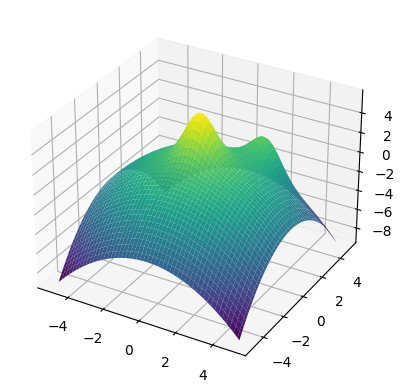

Para o ponto inicial [5 5] e alpha = 0.05, o máximo da função ocorre em: x = 1.865268245563886, y = 2.751575540419227, sendo o número de iterações 63.
Para o ponto inicial [5 5] e alpha = 0.1, o máximo da função ocorre em: x = 1.8652679319200787, y = 2.751575300034557, sendo o número de iterações 28.
Para o ponto inicial [5 5] e alpha = 0.15, o máximo da função ocorre em: x = 1.86526740815675, y = 2.7515745681811543, sendo o número de iterações 15.
Para o ponto inicial [5 5] e alpha = 0.2, o máximo da função ocorre em: x = 1.8652679484946948, y = 2.7515735988542063, sendo o número de iterações 13.
Para o ponto inicial [5 5] e alpha = 0.3, o máximo da função ocorre em: x = 1.8652683350119375, y = 2.7515733632395962, sendo o número de iterações 52.
Para o ponto inicial [5 5] e alpha = 0.5, o algoritmo não convergiu dentro de 10000 iterações.
Para o ponto inicial [5 5] e alpha = 0.7, o algoritmo não convergiu dentro de 10000 iterações.
Para o ponto inicial [5 5] e alpha = 1, o algoritmo n

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

def h(x, y):
    return 4*np.exp(-x**2 - y**2) + 3*np.exp(-x**2 - y**2 + 4*x + 6*y -13) - (x**2 / 5) - (y**2 / 4) + 2


def gradiente(x, y):
    dhdx = -6*(x - 2)*np.exp(-x**2 + 4*x - y**2 + 6*y - 13) - 8*x*np.exp(-x**2 - y**2) - (2*x / 5)
    dhdy = -8*y*np.exp(-x**2 - y**2) - 6*(y - 3)*np.exp(-x**2 + 4*x - y**2 + 6*y - 13) - (y / 2)
    return np.array([dhdx, dhdy])
    

# gráfico da função
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = h(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

# vamos encontrar os pontos máximos
def algoritmo(p_inicial, alfa, precisao, max_iter=10000):
    iter = 0
    p = p_inicial
    while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
        p = p + alfa * gradiente(p[0], p[1])
        iter += 1
        if iter > max_iter:
            break
    return p, iter

# Pontos iniciais
p_iniciais = [np.array([5, 5]), np.array([5, -5]), np.array([-5, -5]), np.array([-5, 5])]

# Valores de alpha
alfas = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 0.7, 1]

# Precisão
precisao = 1e-5

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_max, steps = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alpha = {alfa}, o algoritmo não convergiu dentro de 10000 iterações.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alpha = {alfa}, o máximo da função ocorre em: x = {x_max[0]}, y = {x_max[1]}, sendo o número de iterações {steps}.')

bruh.